# Evaluating Classification Models Performance
## 122. False Positives & False Negative
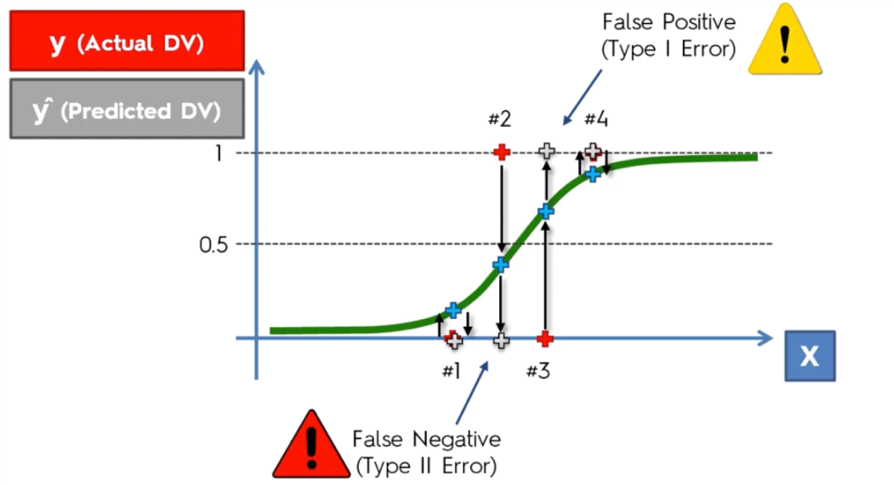
False Positives和False Negative就是所謂的假陽和假陰，也就是常聽到的型一誤差(TYPE I ERROR)和型二誤差(TYPE II ERROR)，<br>
白話一點解釋，型一誤差(假陽)就是實際上是不會發生但模型預測會發生，如圖中點#3；<br>
型二誤差(假陰)則是實際上是會發生但模型預測不會發生，如圖中點#2，<br>
一般來說型二誤差比較嚴重，因為我們關注想要用模型來預測的結果(發生)並沒有被有效預測出來，而型一誤差可把它視為一種警訊。<br>

## 123. Confusion Matrix
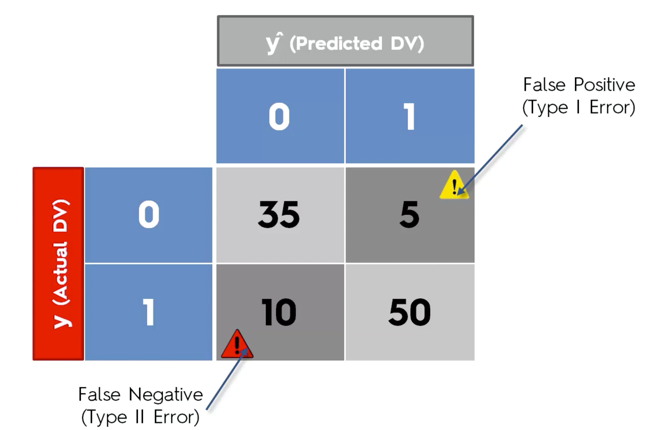
混淆矩陣其實在過去課程的模型建立過程中有提到過，它可用來歸納預測結果好壞，列表示實際的結果、行表示預測的結果，<br>
所以這個2*2矩陣的左上、右下就是預測準確的部分，右上是發生型一誤差、左下則是發生型二誤差。<br>
這個矩陣也能方便我們計算: <br>
準確率Accuracy Rate(AR) = correct / total = 85 / 100 = 85%<br>
錯誤率Error Rate(ER) = wrong / total = 15 / 100 = 15%<br>

## 124. Accuracy paradox
#### 有些狀況下，其實準確率並無法反映模型的好壞，可藉由以下例子理解到:
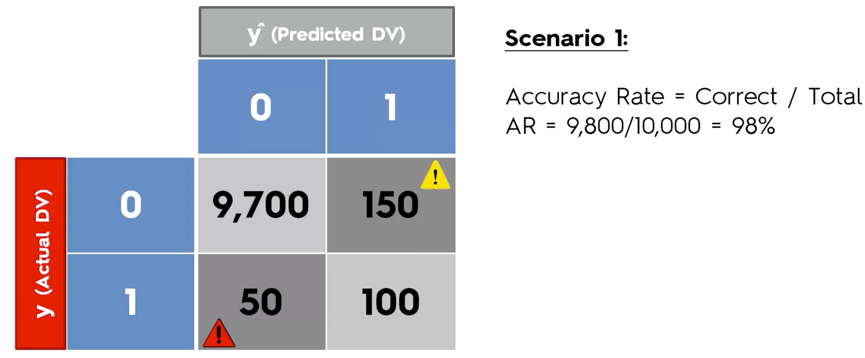
#### 如果我們都預測為0，反而使準確度提升，這樣似乎並不合理，因此在某一種結果和另一種結果數量上有懸殊差異時，不應僅用準確率來衡量模型好壞。
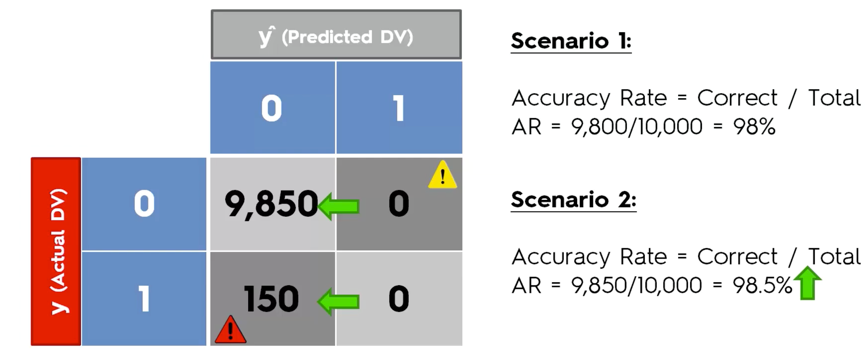

## 125. CAP Curve
CAP(Cumulative Accuracy Profile)：評估預測模型效力的一種方式<br>
概念是反應隨著抓取的樣本資料百分比量不同，指最有可能發生預測目標(eg. 發生購買行為)的前百分比資料，計算此一情形的模型預測出發生的筆數佔全部樣本資料發生的筆數，能作為模型好壞的評估。<br>
先將x軸轉換為%單位，並將樣本依照最有可能發生->不可能發生進行排序，假設total共有100人，分成未購買人數90以及有購買人數10，取前10%(x軸)，共有10人，並找模型配適購買率90%以上，確實有購買的人數為8人，8/10=80%(y軸)，依照此規則，抓取各百分比的資料量，畫出CAP線。<br>
Random: 這個模型預測結果是隨機的，代表這模型不具有任何預測能力;<br>
Crystal Ball: 完美的預測模型效果。<br>
CAP曲線越往左上，表示越接近完美的模型預測效果<br>
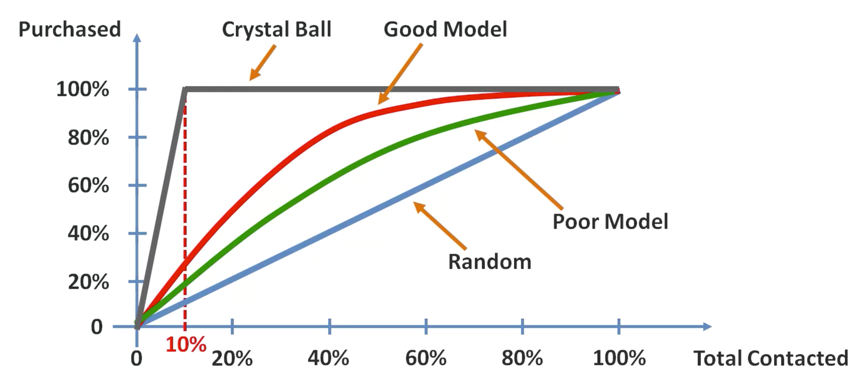

## 126. CAP Curve Analysis
方法1: 將 CAP 曲線加以量化，以AR來衡量，評分模型的區別力，AR值會介於 0~100% 之間，愈接近 100%表示該模型之預測能力愈佳。<br>
其中aP為完美模型與隨機模型間之面積；<br>
aR為實際評分模型與隨機模型間之面積。<br>
![126.png](aachment:126.png)
方法2: 以50%作為區別度，依照X%座落的數值，可判別此模型的好壞，準則可參考圖中範圍。
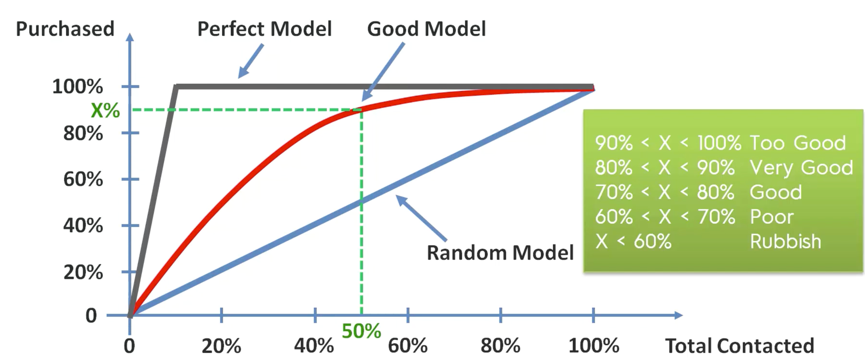

## 補充 ROC (Receiver Operating Characteristic)
ROC 不等於 CAP;<br>
ROC: 是一種分類器，可將資料進行二分法(FP%、TP%)，觀測其分類結果及趨勢。<br>
TP 為 True Positive 之意(混淆矩陣右下)，TP%即實際上發生且模型的估計結果也判定發生的比率(Y軸);<br>
FN 為 False Negative 之意(混淆矩陣左下)，FN%即實際上發生但模型的估計結果卻未判定是違約的比率，這種錯誤稱為型二錯誤(Type II Error)，<br>
在這樣的定義之下，TP%+FN%=1。<br>
FP 為 False Positive 之意(混淆矩陣右上)，FP%即實際上未發生但模型的估計結果卻判定為發生的比率(X軸)，這種錯誤稱為型一錯誤(Type I Error);<br>
TN 為 True Negative 之意(混淆矩陣左上)，TN%即實際上未發生且模型的估計結果也判定未發生的比率，<br>
這樣的定義之下，FP%+TN%=1。<br>
依據不同的資料量抓取百分比 0~100%，可以得到不同的混淆矩陣，而 ROC曲線就是在繪製 FP%與 TP%之間的關係。<br>
描繪 ROC曲線要先以對應 10%、15%、⋯、100% 的FP%，找到不同的資料量抓取百分比，再根據不同的資料量抓取百分比找到不同的 TP%。<br>

ROC 曲線來看，在同一個 TP%之下，FP%越小，則代表造成的型一錯誤越小，代表模型的檢測效力越好，因此ROC 曲線越往左上，ROC 曲線下的面積越大，則代表模型越好。